In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd

from utils import load_nifti, load_masked_nifti, normalize_float

In [3]:
# Global variables
path_to_dir = "/analysis/share/ADNI/preprocessed/"
filename = 'INTERNAL_WARPED.nii.gz'
visit_types = ['Baseline','Month12','Month24']

In [5]:
mask = None
remove_nan = True

In [6]:
file_names = []
base_shape = (91, 109, 91)

In [32]:
# Load scans and compute average scan
i = 0
total_norm = 0
data = np.zeros(shape=(89*3, 91, 109, 91))

for subject in os.listdir(path_to_dir)[:]:
    for visit in visit_types:
        # Define full path
        path = os.path.join(path_to_dir,
                            subject,
                            visit,
                            filename)
        # Use errorhandling to load files
        try:
            if mask is None:
                struct_arr = load_nifti(path)
            else:
                struct_arr = load_masked_nifti(path, mask, sess, scan_pl, mask_pl)
        except FileNotFoundError:
            print('Image not Found:', path, i)
        if remove_nan:
            struct_arr[np.where(np.isnan(struct_arr))] = 0
        
        # Squash between 0 and 1
        struct_arr = normalize_float(struct_arr, min=0.)
        struct_arr = struct_arr.numpy()
        
        # Store names and scan data
        file_names.append(os.path.join(subject, visit))
        data[i] = struct_arr
        i += 1
avg_scan = np.mean(data, axis=0)

Image not Found: /analysis/share/ADNI/preprocessed/027_S_1387/Month24/INTERNAL_WARPED.nii.gz 149
Image not Found: /analysis/share/ADNI/preprocessed/037_S_0501/Month12/INTERNAL_WARPED.nii.gz 238


(91, 109, 91)


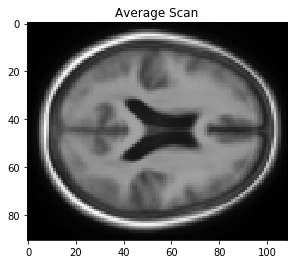

In [37]:
print(avg_scan.shape)
plt.imshow(avg_scan[:,:,45], cmap='gray')
plt.title('Average Scan')
plt.show()

(91, 109, 91)


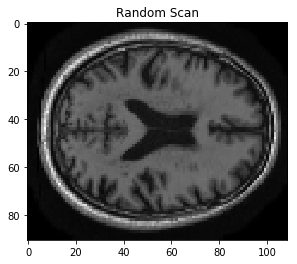

In [38]:
print(data[0].shape)
plt.imshow(data[0][:,:,45], cmap='gray')
plt.title('Random Scan')
plt.show()

116_S_0487/Baseline Distance from template: 647.85677343 


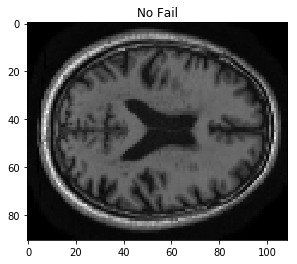

116_S_0487/Month12 Distance from template: 662.625992489 ###


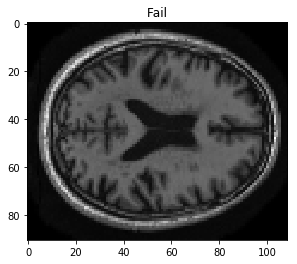

116_S_0487/Month24 Distance from template: 958.198555498 ###


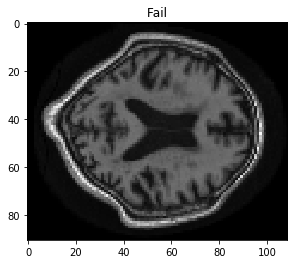

018_S_0335/Baseline Distance from template: 513.725300845 


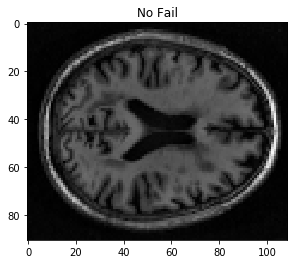

018_S_0335/Month12 Distance from template: 484.740414903 


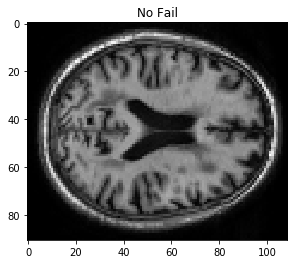

018_S_0335/Month24 Distance from template: 509.948491994 


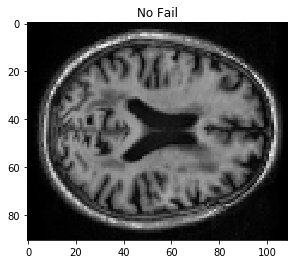

007_S_1222/Baseline Distance from template: 1053.68401778 ###


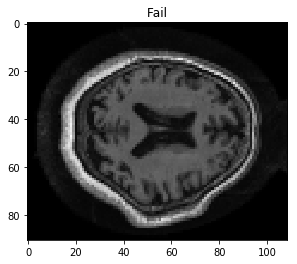

007_S_1222/Month12 Distance from template: 883.619819087 ###


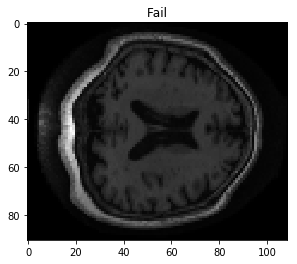

007_S_1222/Month24 Distance from template: 633.042955345 


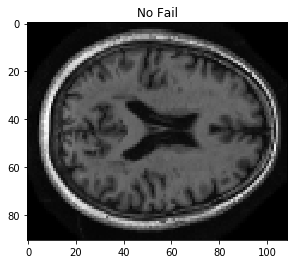

031_S_1066/Baseline Distance from template: 677.743555749 ###


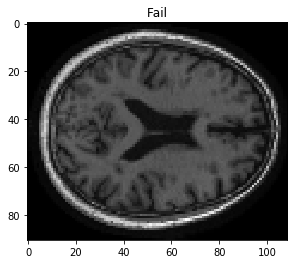

031_S_1066/Month12 Distance from template: 877.323670046 ###


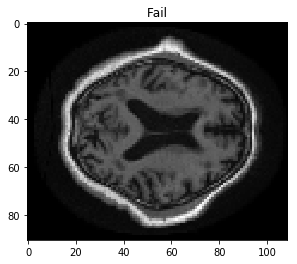

031_S_1066/Month24 Distance from template: 583.027853254 


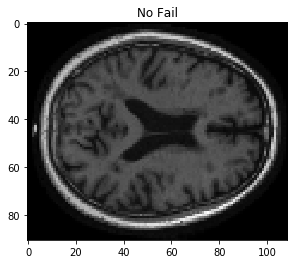

136_S_0429/Baseline Distance from template: 463.091500528 


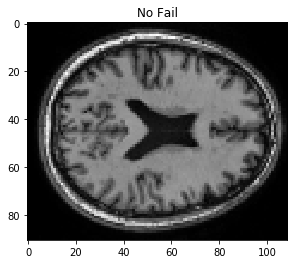

136_S_0429/Month12 Distance from template: 420.398157 


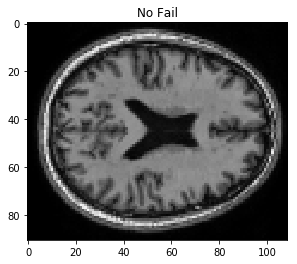

136_S_0429/Month24 Distance from template: 456.525757107 


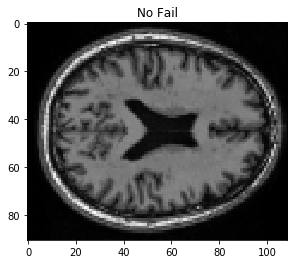

130_S_0969/Baseline Distance from template: 695.173654942 ###


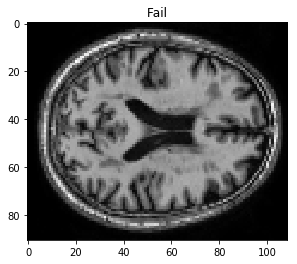

130_S_0969/Month12 Distance from template: 610.256984786 


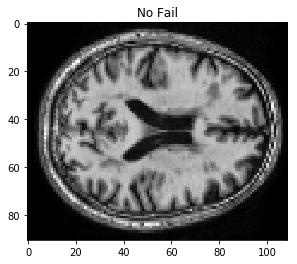

130_S_0969/Month24 Distance from template: 573.037121525 


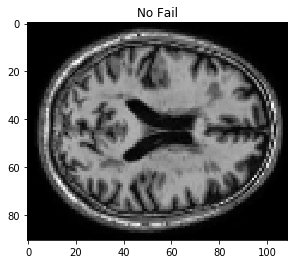

130_S_0449/Baseline Distance from template: 577.776323379 


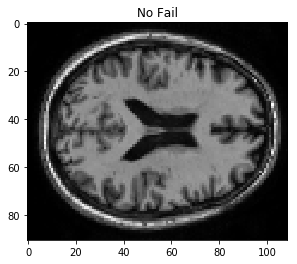

130_S_0449/Month12 Distance from template: 452.620454428 


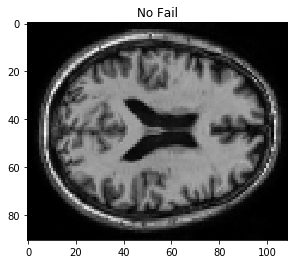

130_S_0449/Month24 Distance from template: 427.110292613 


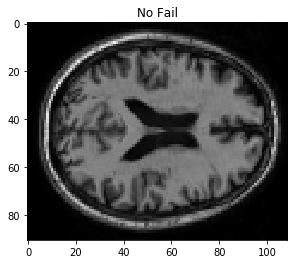

032_S_1169/Baseline Distance from template: 783.694926296 ###


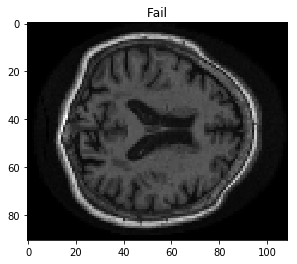

032_S_1169/Month12 Distance from template: 822.158373915 ###


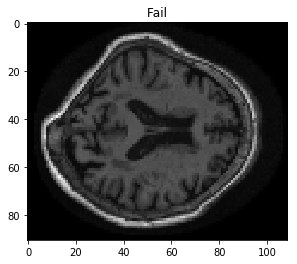

032_S_1169/Month24 Distance from template: 794.299286259 ###


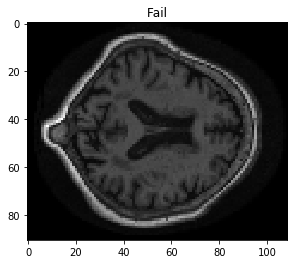

005_S_0553/Baseline Distance from template: 473.580244713 


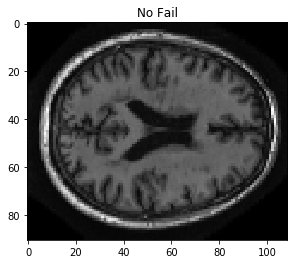

005_S_0553/Month12 Distance from template: 616.040947761 


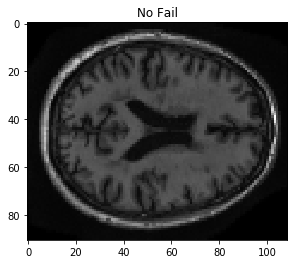

005_S_0553/Month24 Distance from template: 489.414083967 


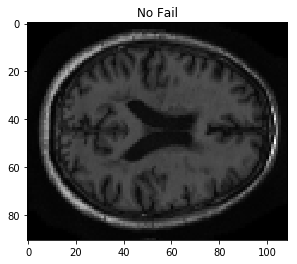

027_S_1082/Baseline Distance from template: 812.827053015 ###


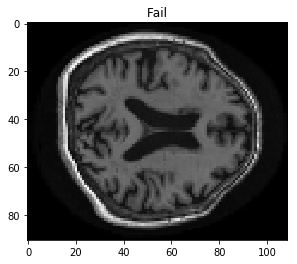

027_S_1082/Month12 Distance from template: 822.237932551 ###


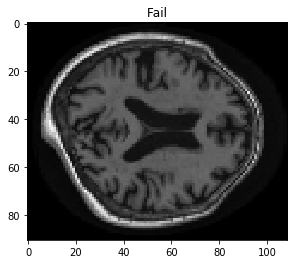

027_S_1082/Month24 Distance from template: 833.727800089 ###


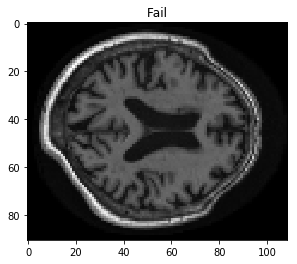

002_S_1261/Baseline Distance from template: 530.131781237 


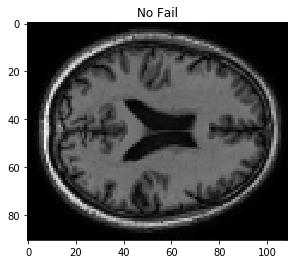

002_S_1261/Month12 Distance from template: 584.322886925 


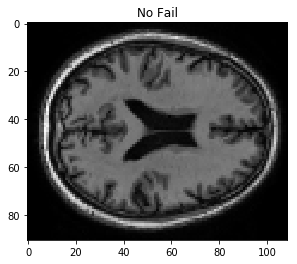

002_S_1261/Month24 Distance from template: 523.277038978 


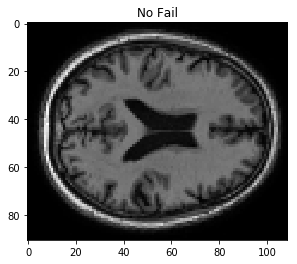

005_S_0572/Baseline Distance from template: 1037.96842056 ###


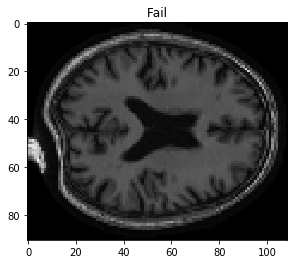

005_S_0572/Month12 Distance from template: 1049.67154314 ###


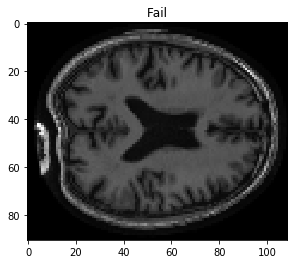

005_S_0572/Month24 Distance from template: 525.084639175 


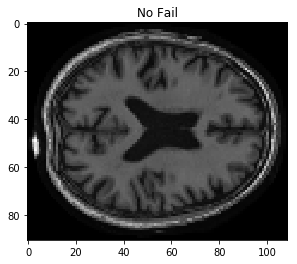

002_S_1018/Baseline Distance from template: 433.24504864 


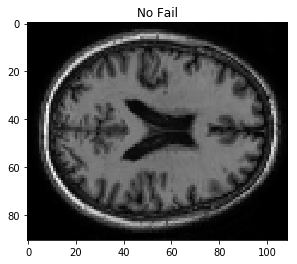

002_S_1018/Month12 Distance from template: 429.263136191 


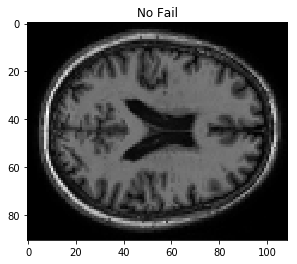

002_S_1018/Month24 Distance from template: 449.417393006 


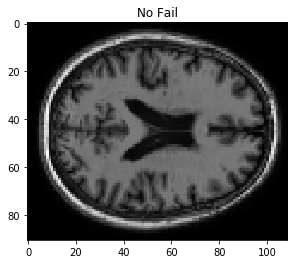

018_S_0369/Baseline Distance from template: 487.563826923 


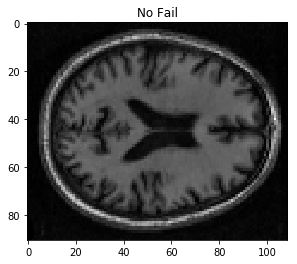

018_S_0369/Month12 Distance from template: 418.955212363 


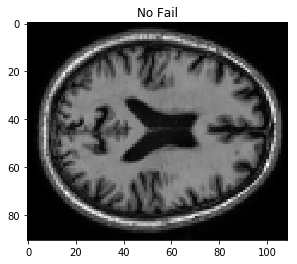

018_S_0369/Month24 Distance from template: 472.111479581 


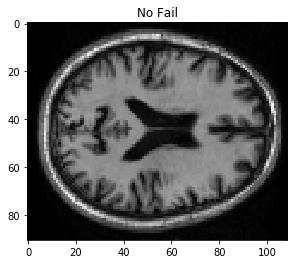

012_S_0689/Baseline Distance from template: 517.663699137 


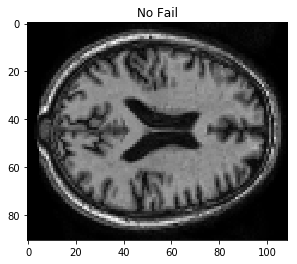

012_S_0689/Month12 Distance from template: 705.006138468 ###


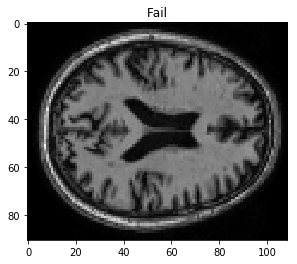

012_S_0689/Month24 Distance from template: 487.552492962 


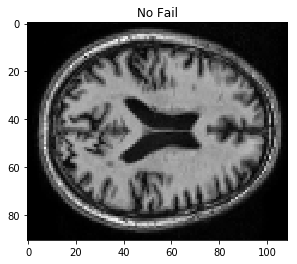

023_S_0388/Baseline Distance from template: 617.690474399 


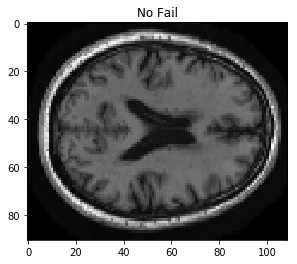

023_S_0388/Month12 Distance from template: 483.516044526 


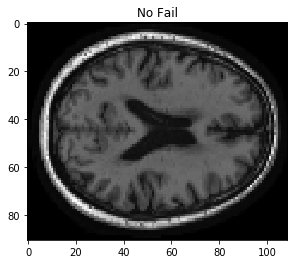

023_S_0388/Month24 Distance from template: 547.2489789 


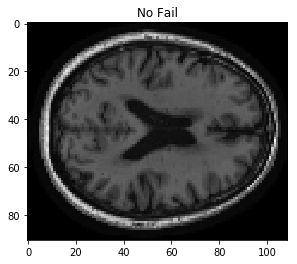

018_S_0450/Baseline Distance from template: 895.999142568 ###


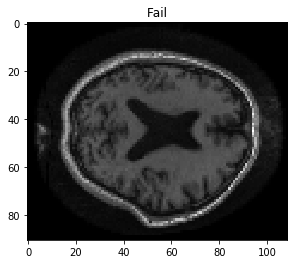

018_S_0450/Month12 Distance from template: 475.191124746 


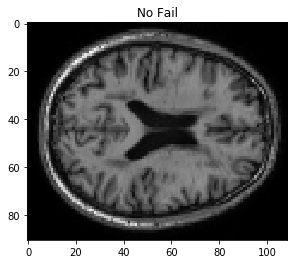

018_S_0450/Month24 Distance from template: 470.288874604 


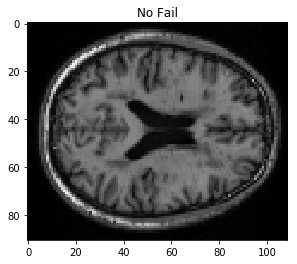

051_S_1331/Baseline Distance from template: 581.964646255 


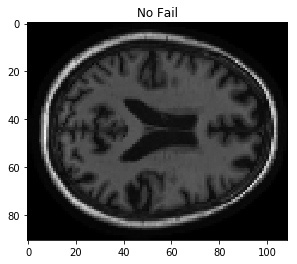

051_S_1331/Month12 Distance from template: 832.088950318 ###


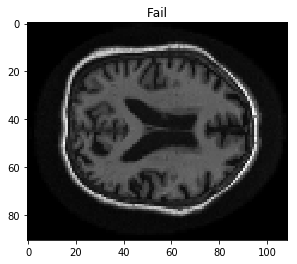

051_S_1331/Month24 Distance from template: 624.570351561 


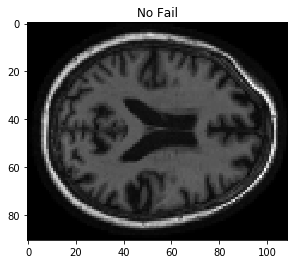

100_S_1286/Baseline Distance from template: 501.674823813 


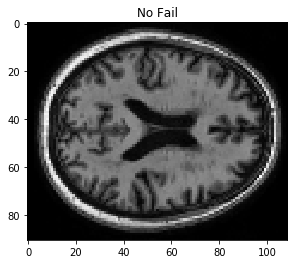

100_S_1286/Month12 Distance from template: 488.014721066 


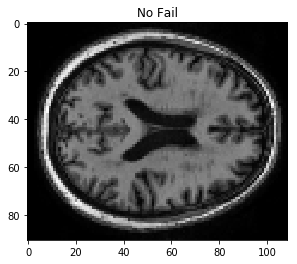

100_S_1286/Month24 Distance from template: 545.455554832 


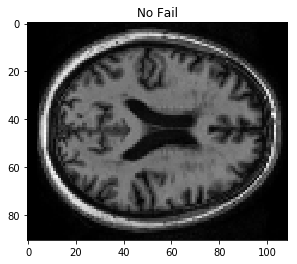

023_S_1247/Baseline Distance from template: 1022.88149327 ###


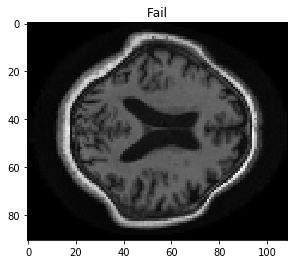

023_S_1247/Month12 Distance from template: 656.057298673 ###


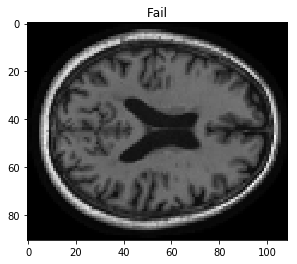

023_S_1247/Month24 Distance from template: 911.061835749 ###


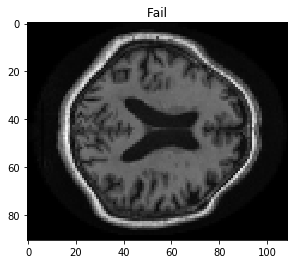

023_S_0916/Baseline Distance from template: 542.521483643 


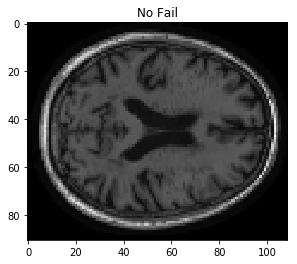

023_S_0916/Month12 Distance from template: 570.337856391 


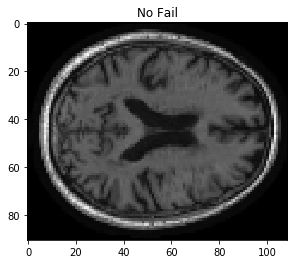

023_S_0916/Month24 Distance from template: 440.375932916 


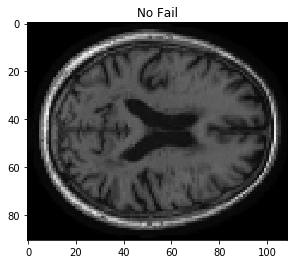

116_S_1249/Baseline Distance from template: 694.786309609 ###


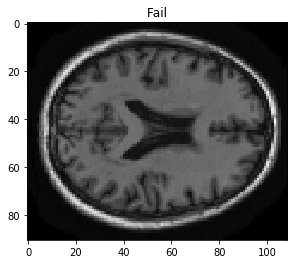

116_S_1249/Month12 Distance from template: 528.170063308 


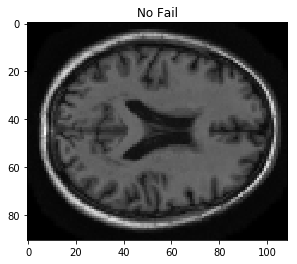

116_S_1249/Month24 Distance from template: 512.154931037 


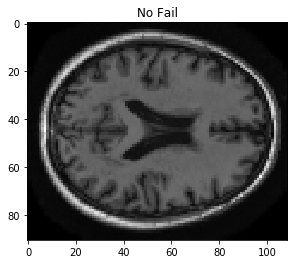

126_S_0605/Baseline Distance from template: 403.875127663 


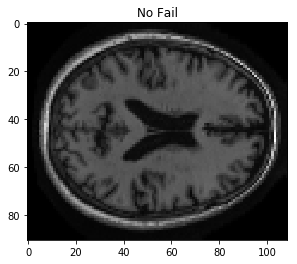

126_S_0605/Month12 Distance from template: 554.587635453 


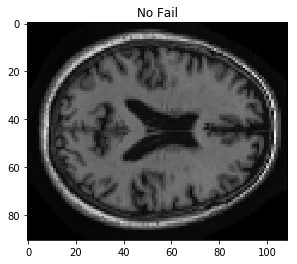

126_S_0605/Month24 Distance from template: 495.178940952 


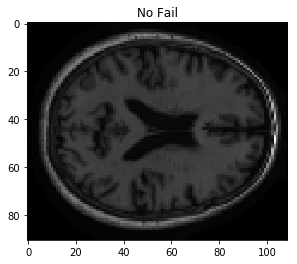

130_S_0956/Baseline Distance from template: 663.783693563 ###


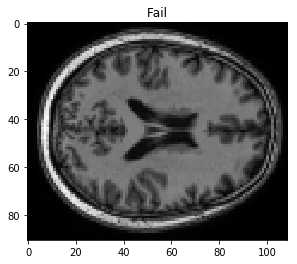

130_S_0956/Month12 Distance from template: 840.464304318 ###


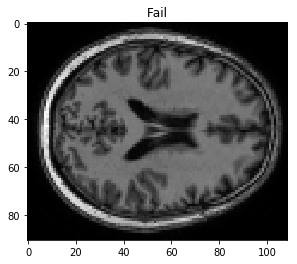

130_S_0956/Month24 Distance from template: 692.29164098 ###


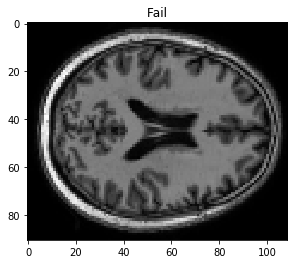

100_S_0015/Baseline Distance from template: 554.83364198 


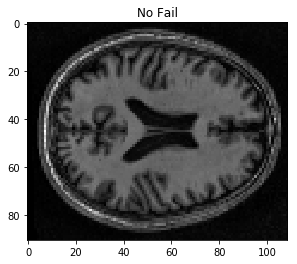

100_S_0015/Month12 Distance from template: 548.347232682 


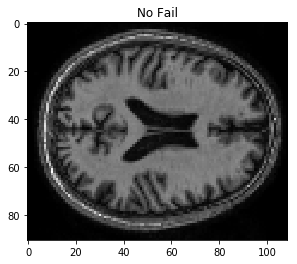

100_S_0015/Month24 Distance from template: 521.574383181 


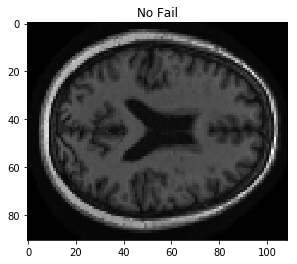

023_S_0604/Baseline Distance from template: 579.163726572 


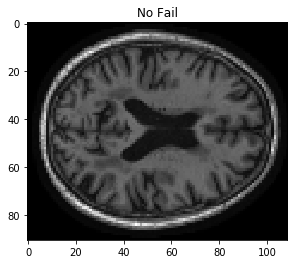

023_S_0604/Month12 Distance from template: 563.344532816 


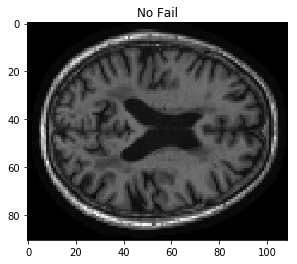

023_S_0604/Month24 Distance from template: 567.663597406 


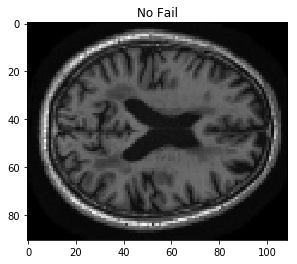

023_S_1262/Baseline Distance from template: 700.382096447 ###


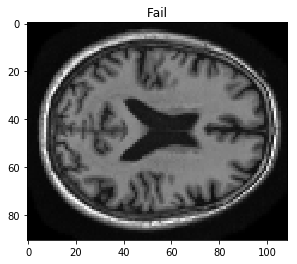

023_S_1262/Month12 Distance from template: 901.827001341 ###


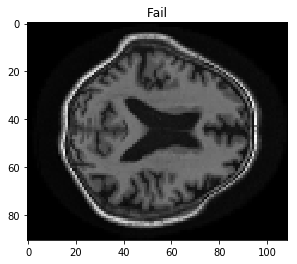

023_S_1262/Month24 Distance from template: 756.985277451 ###


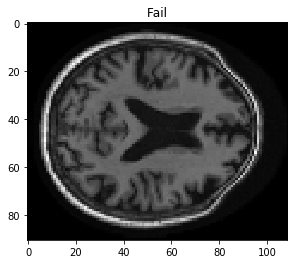

002_S_0413/Baseline Distance from template: 462.778925492 


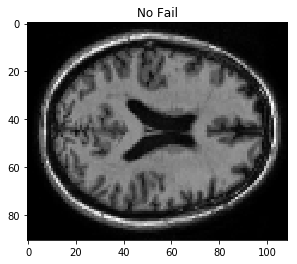

002_S_0413/Month12 Distance from template: 450.700441897 


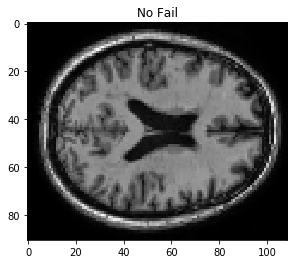

002_S_0413/Month24 Distance from template: 422.529273283 


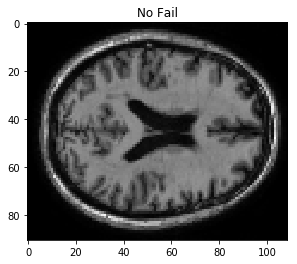

023_S_0030/Baseline Distance from template: 864.057967853 ###


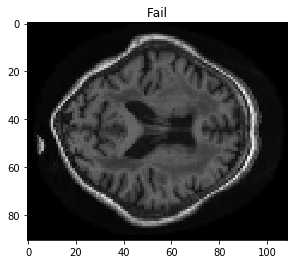

023_S_0030/Month12 Distance from template: 810.019971764 ###


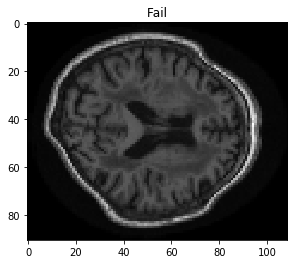

023_S_0030/Month24 Distance from template: 883.919973758 ###


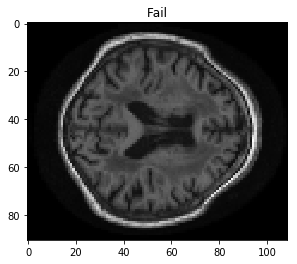

023_S_0376/Baseline Distance from template: 698.652562009 ###


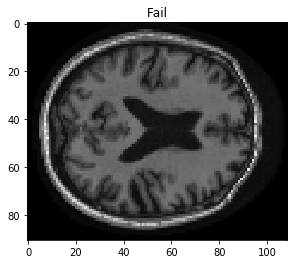

023_S_0376/Month12 Distance from template: 723.481606175 ###


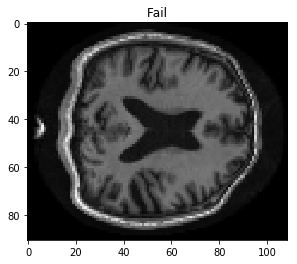

023_S_0376/Month24 Distance from template: 390.072082987 


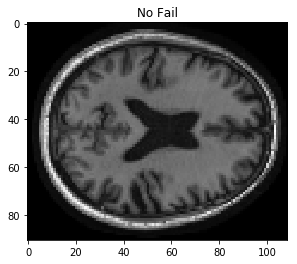

067_S_0607/Baseline Distance from template: 585.011001631 


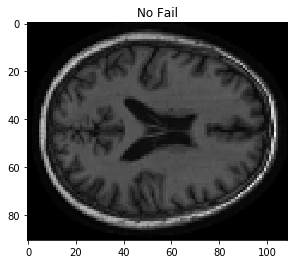

067_S_0607/Month12 Distance from template: 616.303028986 


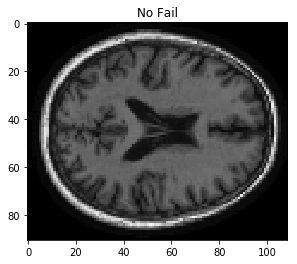

067_S_0607/Month24 Distance from template: 625.700673615 


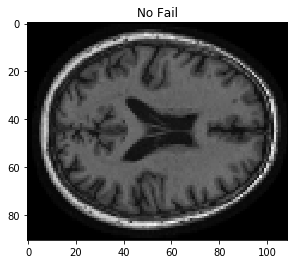

027_S_1081/Baseline Distance from template: 695.178898885 ###


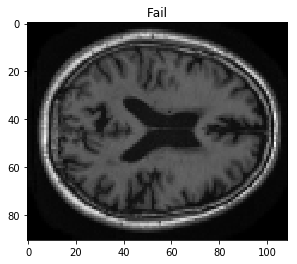

027_S_1081/Month12 Distance from template: 775.334506209 ###


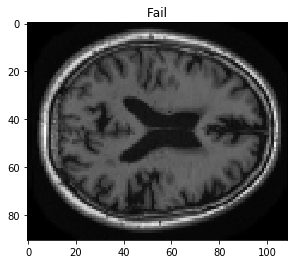

027_S_1081/Month24 Distance from template: 742.249036056 ###


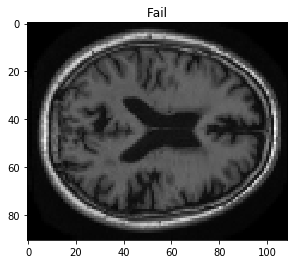

136_S_0184/Baseline Distance from template: 559.944637562 


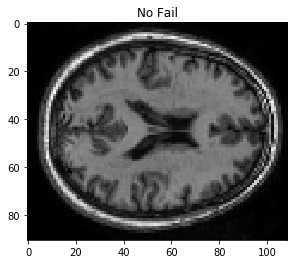

136_S_0184/Month12 Distance from template: 509.213887161 


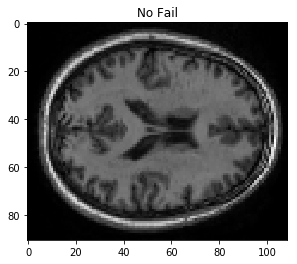

136_S_0184/Month24 Distance from template: 611.884676643 


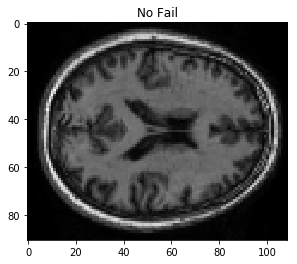

018_S_0633/Baseline Distance from template: 616.075339588 


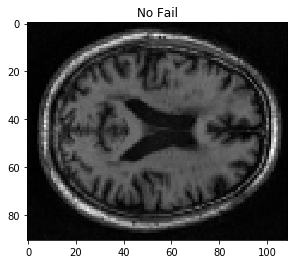

018_S_0633/Month12 Distance from template: 785.910892029 ###


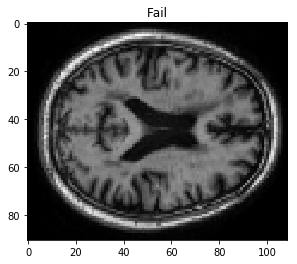

018_S_0633/Month24 Distance from template: 733.972601367 ###


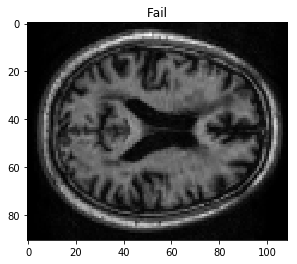

027_S_0403/Baseline Distance from template: 411.159884628 


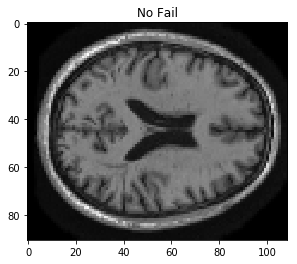

027_S_0403/Month12 Distance from template: 439.081234827 


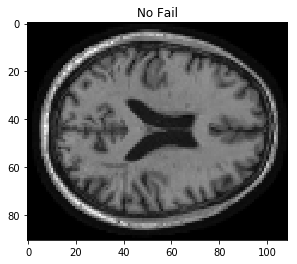

027_S_0403/Month24 Distance from template: 459.638081845 


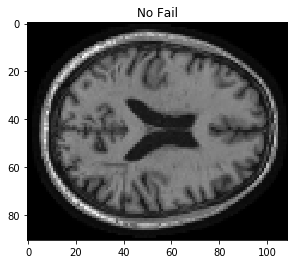

002_S_1268/Baseline Distance from template: 533.110403128 


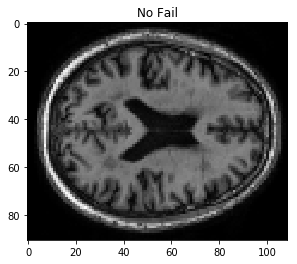

002_S_1268/Month12 Distance from template: 665.71084929 ###


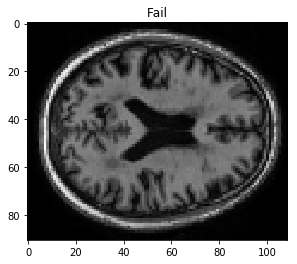

002_S_1268/Month24 Distance from template: 629.61265123 


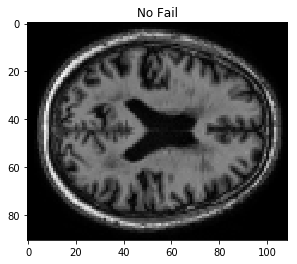

023_S_0625/Baseline Distance from template: 441.566492247 


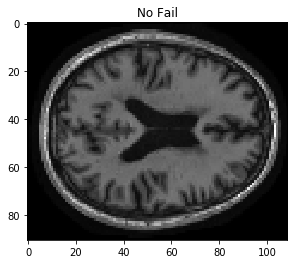

023_S_0625/Month12 Distance from template: 539.536917969 


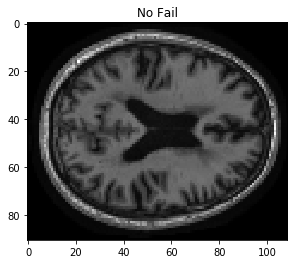

023_S_0625/Month24 Distance from template: 555.939284111 


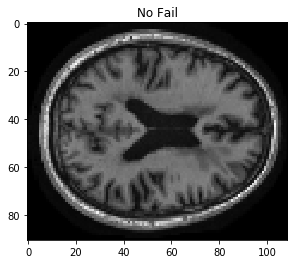

136_S_0300/Baseline Distance from template: 585.408047313 


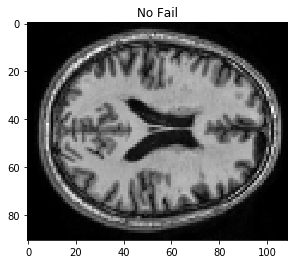

136_S_0300/Month12 Distance from template: 494.05679826 


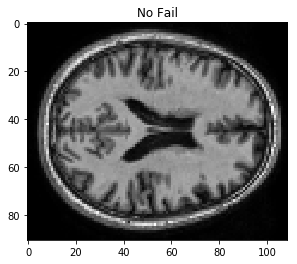

136_S_0300/Month24 Distance from template: 520.217887638 


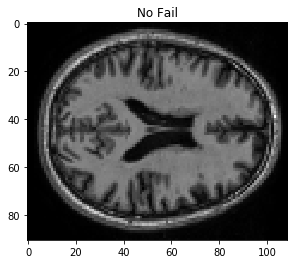

005_S_0814/Baseline Distance from template: 526.876975838 


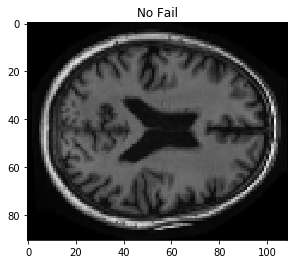

005_S_0814/Month12 Distance from template: 646.84700224 


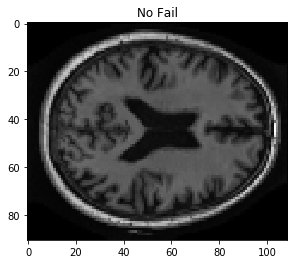

005_S_0814/Month24 Distance from template: 620.72676855 


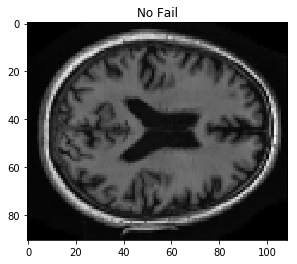

023_S_0061/Baseline Distance from template: 527.667617283 


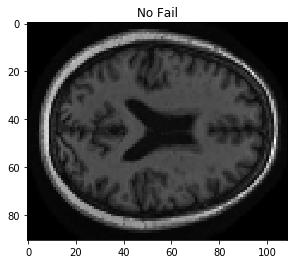

023_S_0061/Month12 Distance from template: 627.052262011 


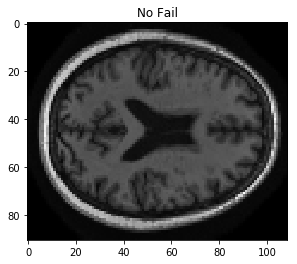

023_S_0061/Month24 Distance from template: 707.594749616 ###


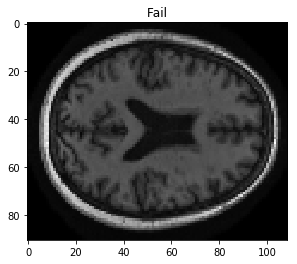

031_S_0830/Baseline Distance from template: 634.050115816 


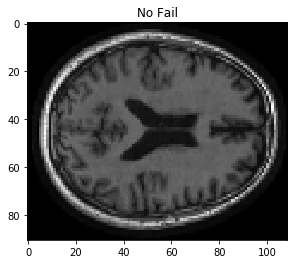

031_S_0830/Month12 Distance from template: 593.913375271 


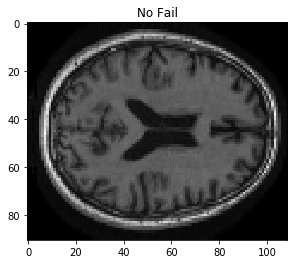

031_S_0830/Month24 Distance from template: 674.51082139 ###


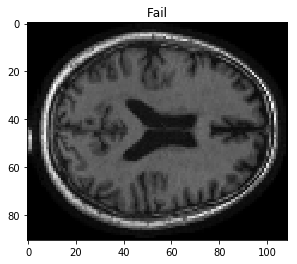

126_S_0606/Baseline Distance from template: 478.063286522 


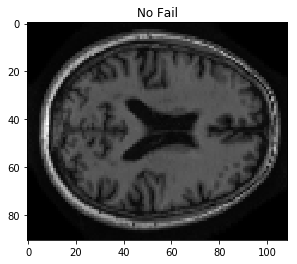

126_S_0606/Month12 Distance from template: 603.35956688 


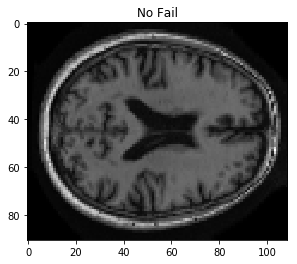

126_S_0606/Month24 Distance from template: 505.341663353 


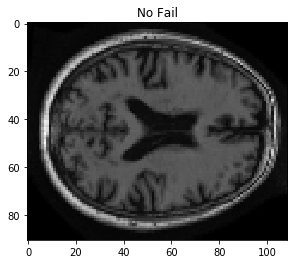

027_S_1385/Baseline Distance from template: 935.851536359 ###


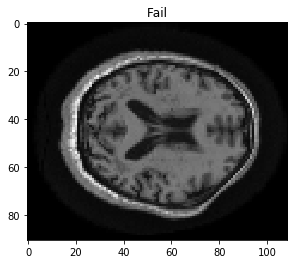

027_S_1385/Month12 Distance from template: 962.476928719 ###


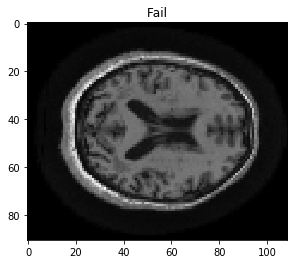

027_S_1385/Month24 Distance from template: 669.609029262 ###


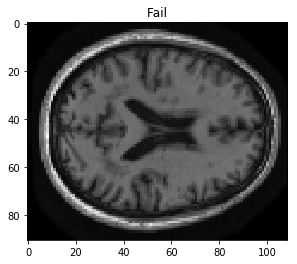

027_S_0404/Baseline Distance from template: 878.410843651 ###


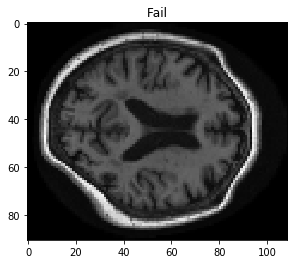

027_S_0404/Month12 Distance from template: 992.261120783 ###


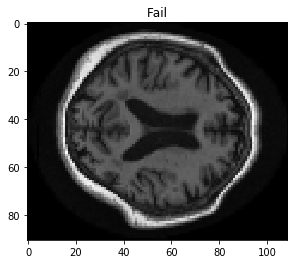

027_S_0404/Month24 Distance from template: 924.541594919 ###


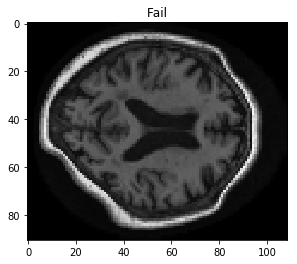

116_S_0382/Baseline Distance from template: 483.357847045 


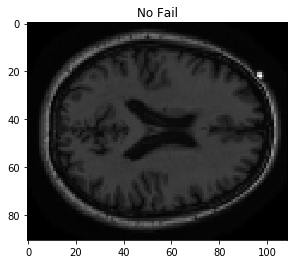

116_S_0382/Month12 Distance from template: 494.108487159 


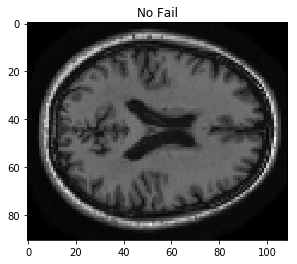

116_S_0382/Month24 Distance from template: 539.512976992 


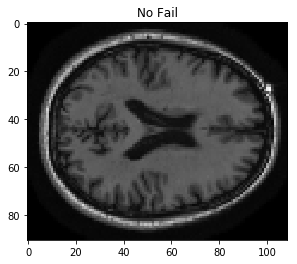

127_S_0844/Baseline Distance from template: 592.093467818 


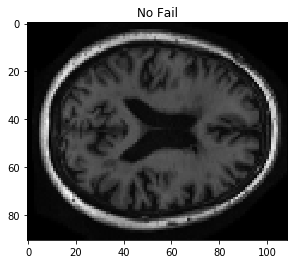

127_S_0844/Month12 Distance from template: 540.371178205 


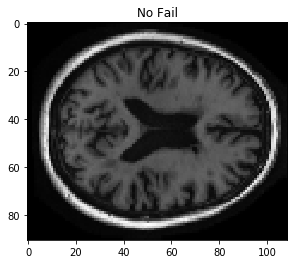

127_S_0844/Month24 Distance from template: 565.934507462 


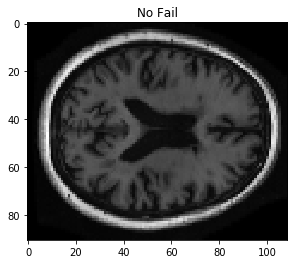

127_S_0622/Baseline Distance from template: 494.295919748 


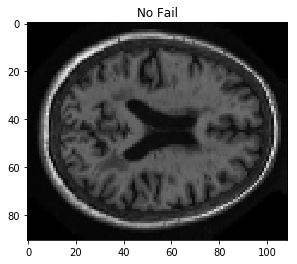

127_S_0622/Month12 Distance from template: 454.739625314 


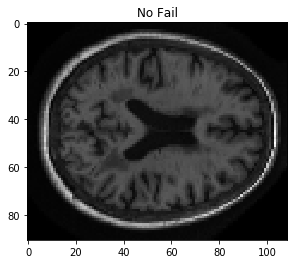

127_S_0622/Month24 Distance from template: 546.423394441 


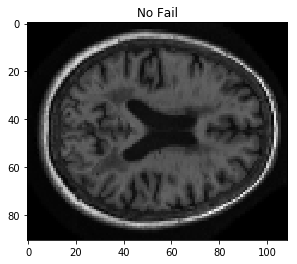

130_S_0505/Baseline Distance from template: 563.772861415 


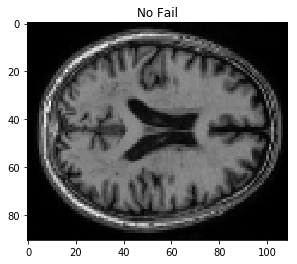

130_S_0505/Month12 Distance from template: 604.976288868 


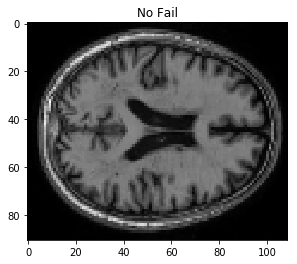

130_S_0505/Month24 Distance from template: 597.909581095 


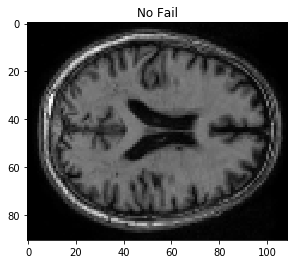

130_S_0886/Baseline Distance from template: 745.414572756 ###


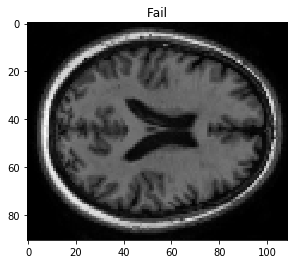

130_S_0886/Month12 Distance from template: 700.773517327 ###


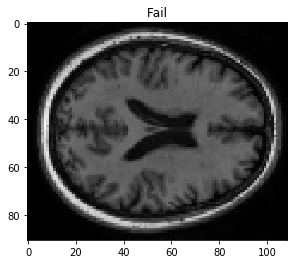

130_S_0886/Month24 Distance from template: 571.594093278 


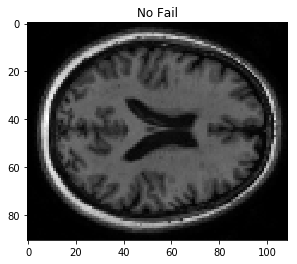

027_S_1387/Baseline Distance from template: 942.713211972 ###


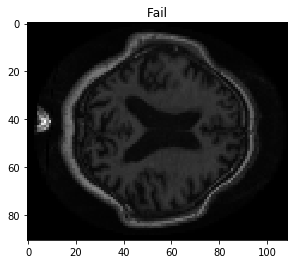

027_S_1387/Month12 Distance from template: 865.228136825 ###


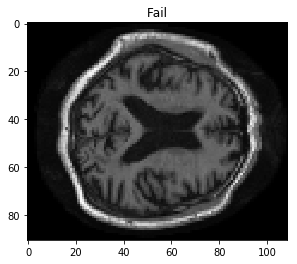

027_S_1387/Month24 Distance from template: 865.228136825 ###


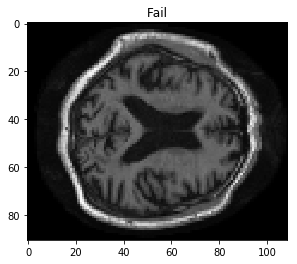

032_S_0677/Baseline Distance from template: 448.153990084 


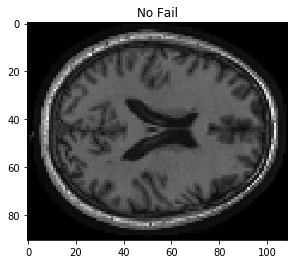

032_S_0677/Month12 Distance from template: 523.459896951 


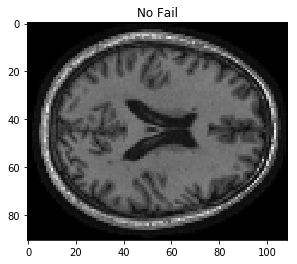

032_S_0677/Month24 Distance from template: 607.389363691 


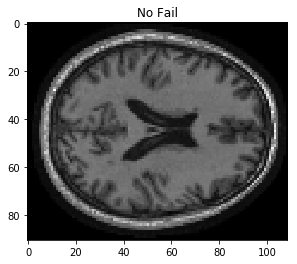

136_S_0086/Baseline Distance from template: 498.815908429 


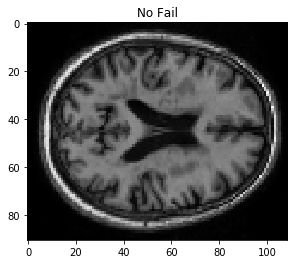

136_S_0086/Month12 Distance from template: 508.462561044 


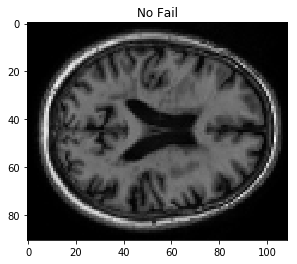

136_S_0086/Month24 Distance from template: 467.800676046 


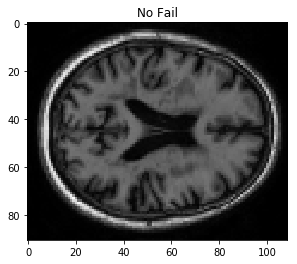

027_S_0307/Baseline Distance from template: 789.794847951 ###


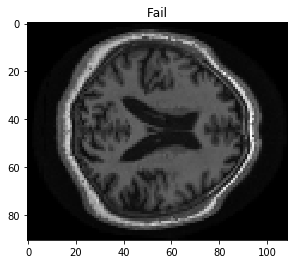

027_S_0307/Month12 Distance from template: 486.662579515 


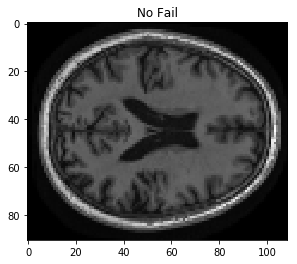

027_S_0307/Month24 Distance from template: 531.030137623 


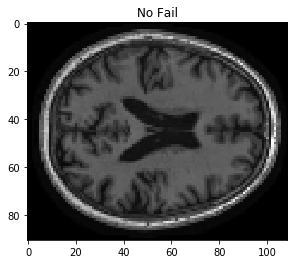

005_S_0324/Baseline Distance from template: 451.422180824 


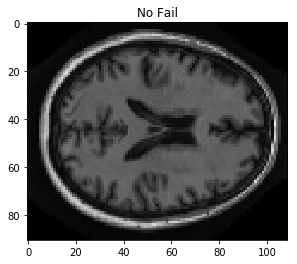

005_S_0324/Month12 Distance from template: 454.136129633 


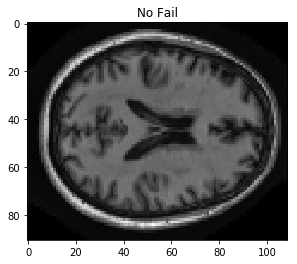

005_S_0324/Month24 Distance from template: 507.26224736 


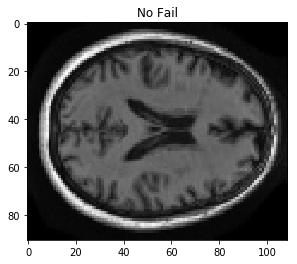

002_S_1070/Baseline Distance from template: 618.8951931 


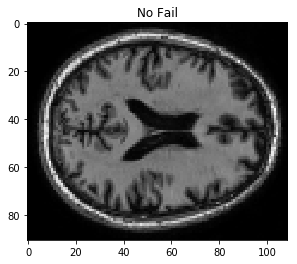

002_S_1070/Month12 Distance from template: 505.083443152 


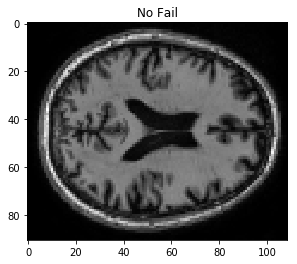

002_S_1070/Month24 Distance from template: 450.313153323 


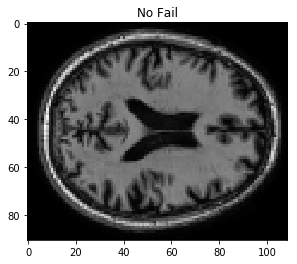

012_S_1009/Baseline Distance from template: 485.88451488 


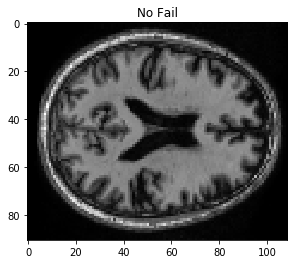

012_S_1009/Month12 Distance from template: 458.149989302 


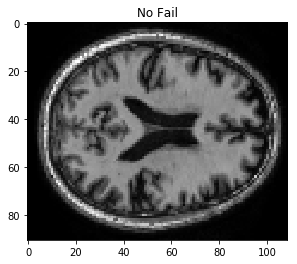

012_S_1009/Month24 Distance from template: 502.500453164 


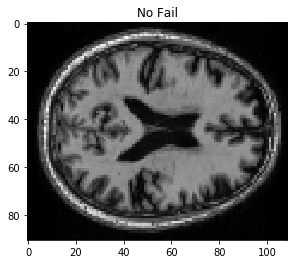

037_S_0303/Baseline Distance from template: 610.308115342 


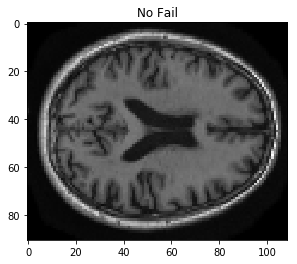

037_S_0303/Month12 Distance from template: 797.706612907 ###


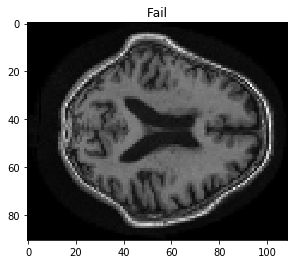

037_S_0303/Month24 Distance from template: 779.856450449 ###


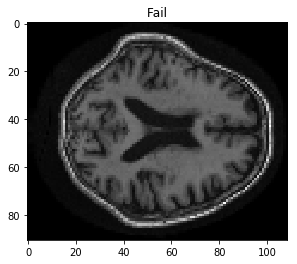

136_S_0579/Baseline Distance from template: 559.96657638 


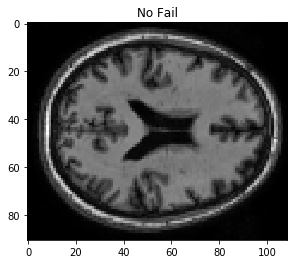

136_S_0579/Month12 Distance from template: 409.855260435 


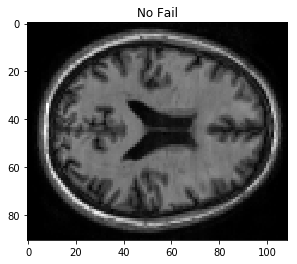

136_S_0579/Month24 Distance from template: 584.153941249 


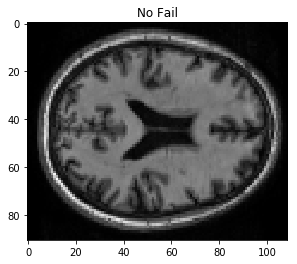

100_S_0190/Baseline Distance from template: 499.039075217 


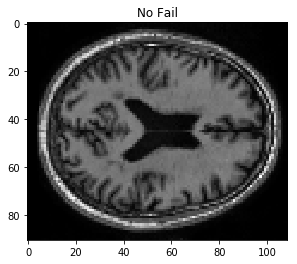

100_S_0190/Month12 Distance from template: 472.899851628 


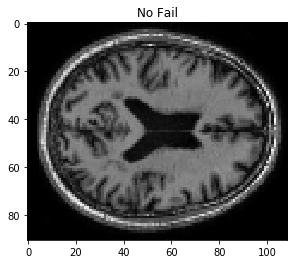

100_S_0190/Month24 Distance from template: 475.338675285 


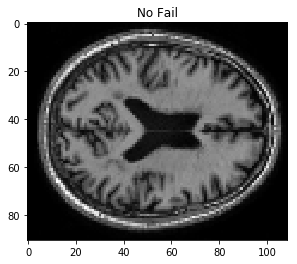

027_S_0835/Baseline Distance from template: 619.396362827 


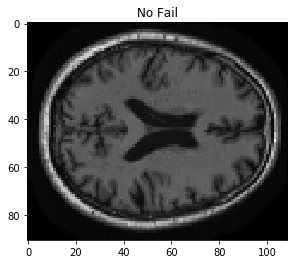

027_S_0835/Month12 Distance from template: 635.700630156 


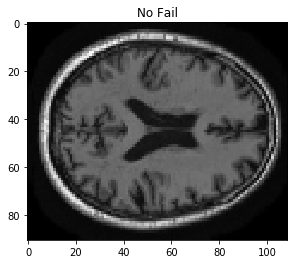

027_S_0835/Month24 Distance from template: 651.251830393 ###


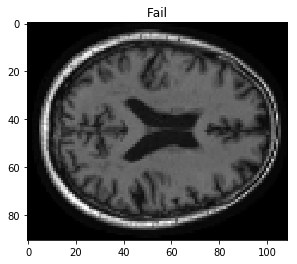

136_S_0195/Baseline Distance from template: 621.567971953 


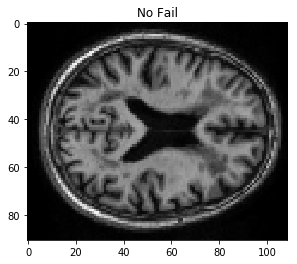

136_S_0195/Month12 Distance from template: 667.809707668 ###


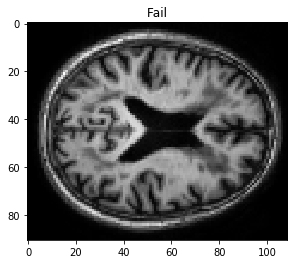

136_S_0195/Month24 Distance from template: 625.829057129 


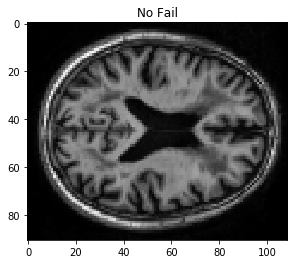

127_S_0260/Baseline Distance from template: 637.258233227 


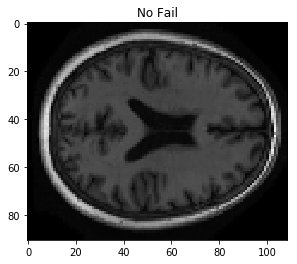

127_S_0260/Month12 Distance from template: 634.511051885 


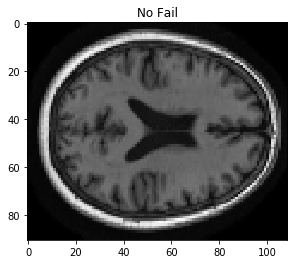

127_S_0260/Month24 Distance from template: 714.116231772 ###


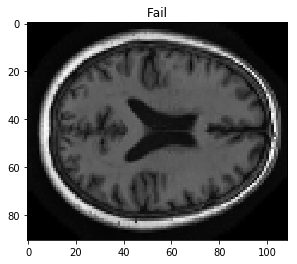

023_S_0331/Baseline Distance from template: 669.363133925 ###


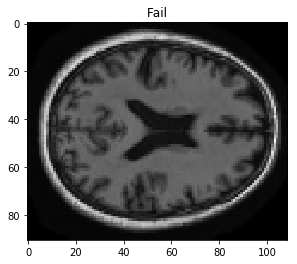

023_S_0331/Month12 Distance from template: 618.679413701 


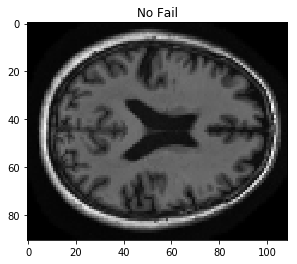

023_S_0331/Month24 Distance from template: 753.643760865 ###


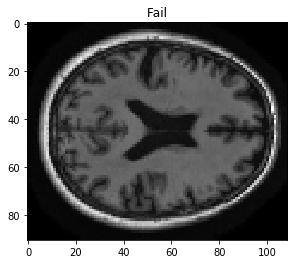

002_S_0559/Baseline Distance from template: 522.032686624 


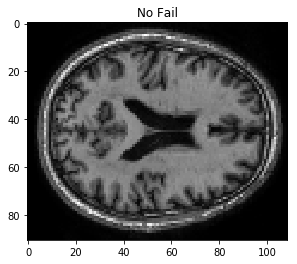

002_S_0559/Month12 Distance from template: 514.326504794 


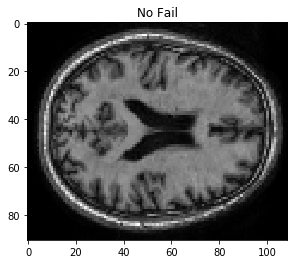

002_S_0559/Month24 Distance from template: 611.228625064 


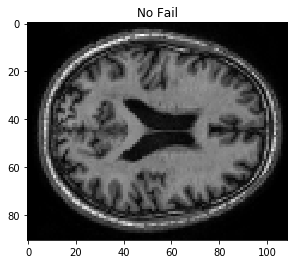

116_S_1232/Baseline Distance from template: 868.676192696 ###


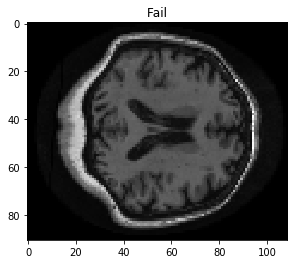

116_S_1232/Month12 Distance from template: 825.399955311 ###


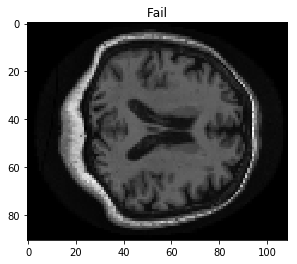

116_S_1232/Month24 Distance from template: 872.763163874 ###


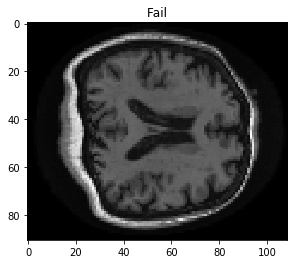

016_S_1121/Baseline Distance from template: 684.128176378 ###


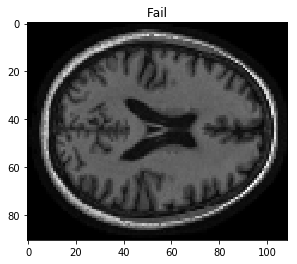

016_S_1121/Month12 Distance from template: 531.195482129 


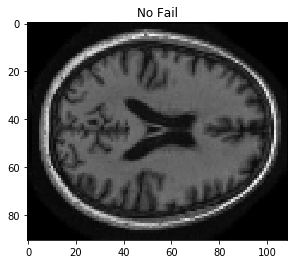

016_S_1121/Month24 Distance from template: 559.109621825 


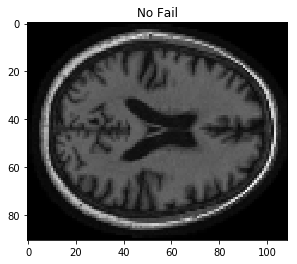

023_S_1126/Baseline Distance from template: 573.074131284 


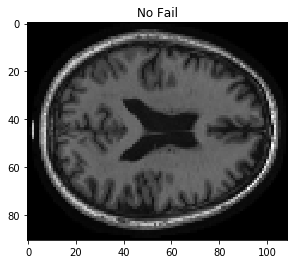

023_S_1126/Month12 Distance from template: 533.613298704 


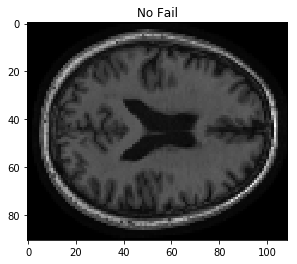

023_S_1126/Month24 Distance from template: 502.012079088 


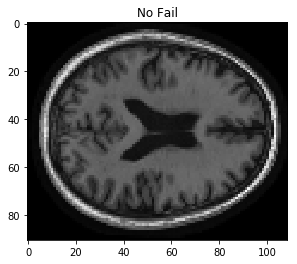

023_S_0963/Baseline Distance from template: 523.739330277 


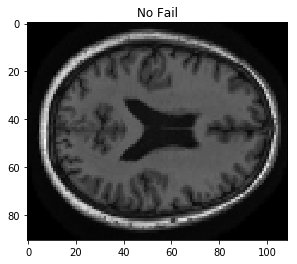

023_S_0963/Month12 Distance from template: 470.539400547 


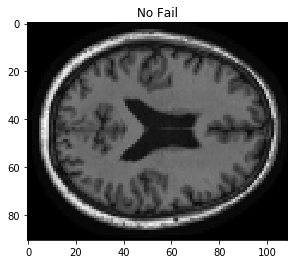

023_S_0963/Month24 Distance from template: 574.982956677 


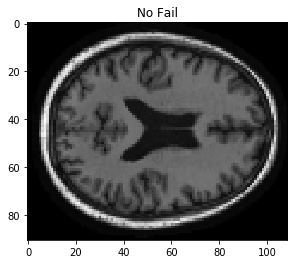

136_S_0426/Baseline Distance from template: 517.647004213 


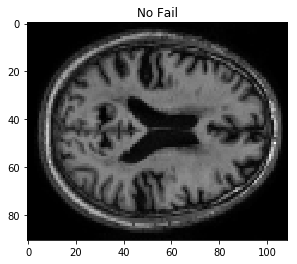

136_S_0426/Month12 Distance from template: 567.939697591 


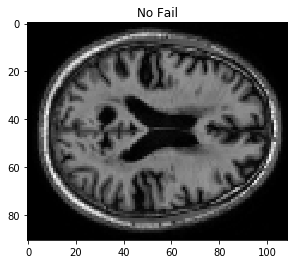

136_S_0426/Month24 Distance from template: 566.556537973 


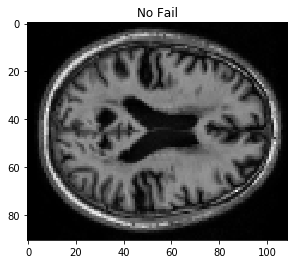

023_S_0926/Baseline Distance from template: 794.194882805 ###


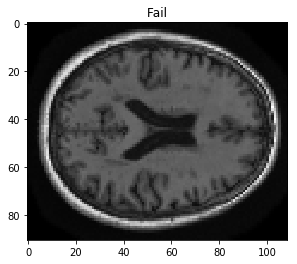

023_S_0926/Month12 Distance from template: 754.099157514 ###


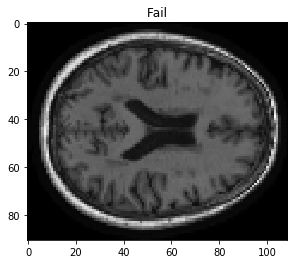

023_S_0926/Month24 Distance from template: 779.602804435 ###


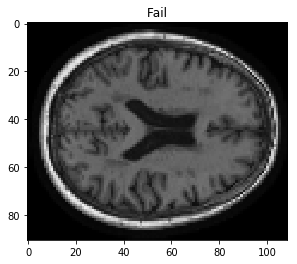

016_S_1117/Baseline Distance from template: 769.502801622 ###


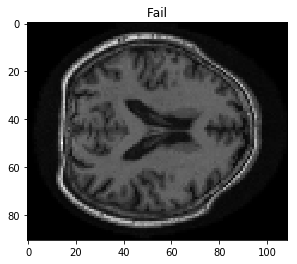

016_S_1117/Month12 Distance from template: 579.607916813 


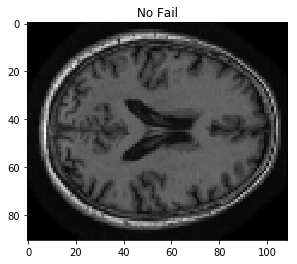

016_S_1117/Month24 Distance from template: 816.473111028 ###


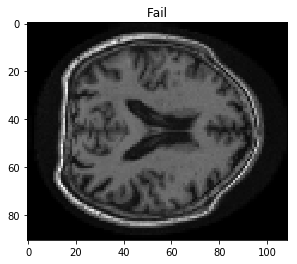

067_S_0290/Baseline Distance from template: 495.923828777 


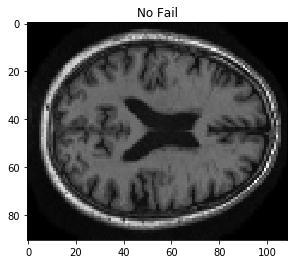

067_S_0290/Month12 Distance from template: 502.454444434 


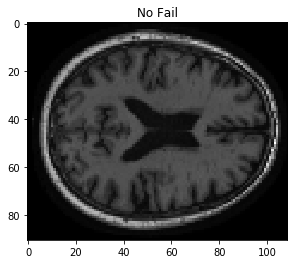

067_S_0290/Month24 Distance from template: 582.856993476 


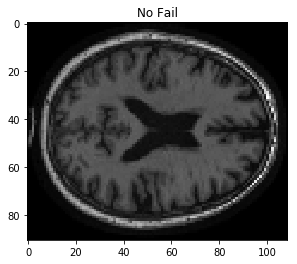

005_S_0448/Baseline Distance from template: 660.499345726 ###


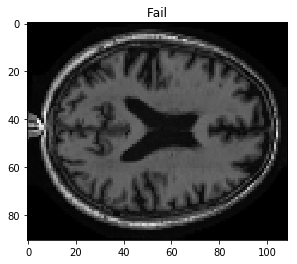

005_S_0448/Month12 Distance from template: 561.390039755 


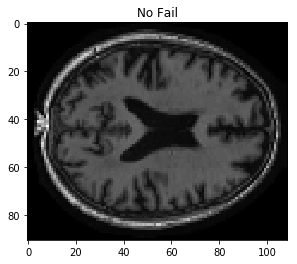

005_S_0448/Month24 Distance from template: 614.900521416 


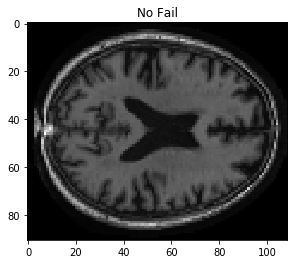

007_S_1206/Baseline Distance from template: 759.308328636 ###


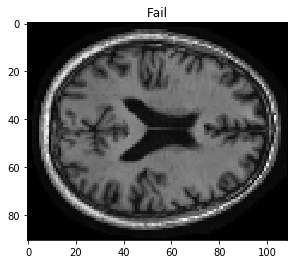

007_S_1206/Month12 Distance from template: 422.730698261 


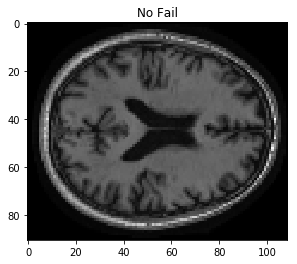

007_S_1206/Month24 Distance from template: 486.128669277 


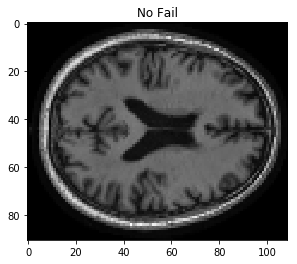

116_S_0649/Baseline Distance from template: 554.001095883 


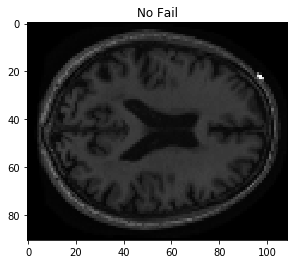

116_S_0649/Month12 Distance from template: 939.199610594 ###


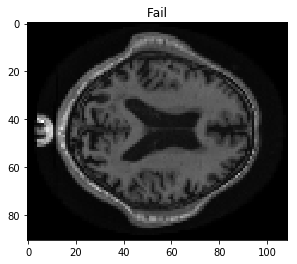

116_S_0649/Month24 Distance from template: 958.23916594 ###


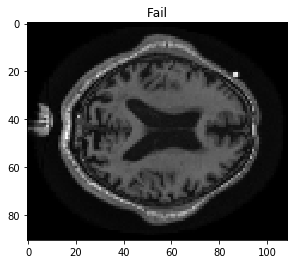

023_S_0058/Baseline Distance from template: 791.458589811 ###


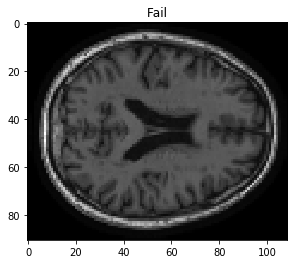

023_S_0058/Month12 Distance from template: 743.355540017 ###


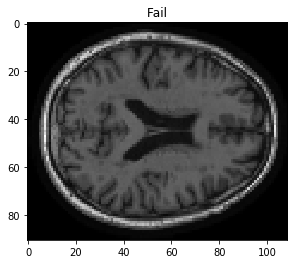

023_S_0058/Month24 Distance from template: 736.514563537 ###


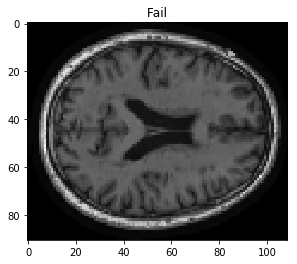

002_S_1280/Baseline Distance from template: 790.583563922 ###


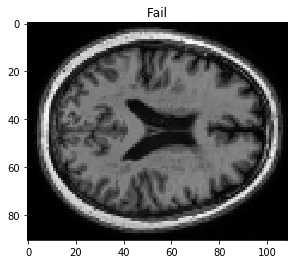

002_S_1280/Month12 Distance from template: 694.292474235 ###


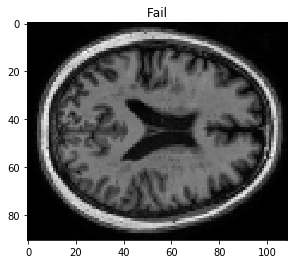

002_S_1280/Month24 Distance from template: 701.477059822 ###


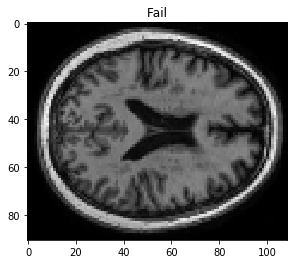

023_S_1190/Baseline Distance from template: 618.667252122 


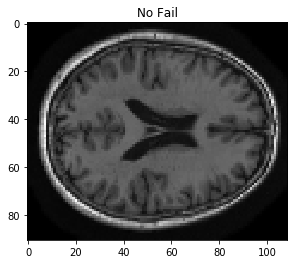

023_S_1190/Month12 Distance from template: 680.116677758 ###


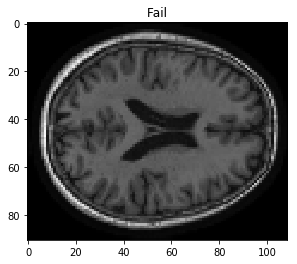

023_S_1190/Month24 Distance from template: 596.059405382 


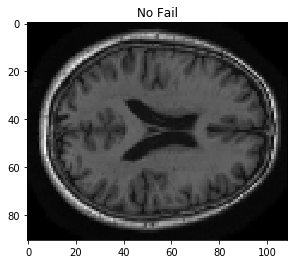

031_S_1209/Baseline Distance from template: 594.840405937 


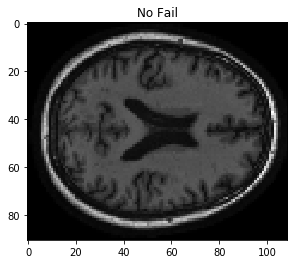

031_S_1209/Month12 Distance from template: 643.694301479 


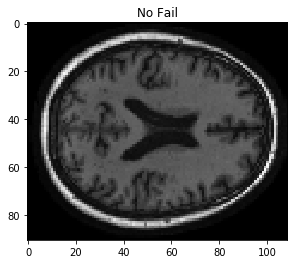

031_S_1209/Month24 Distance from template: 581.622496573 


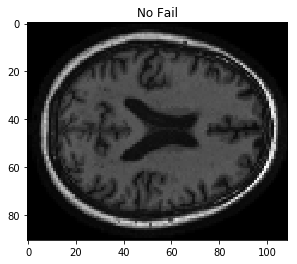

037_S_0501/Baseline Distance from template: 1029.70058861 ###


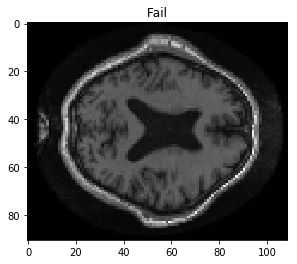

037_S_0501/Month12 Distance from template: 1029.70058861 ###


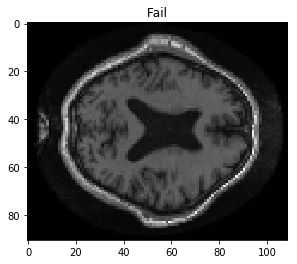

037_S_0501/Month24 Distance from template: 797.98585672 ###


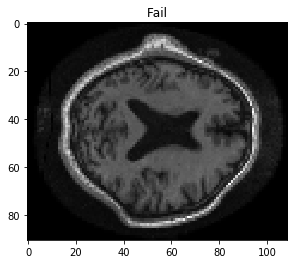

018_S_0425/Baseline Distance from template: 561.460757557 


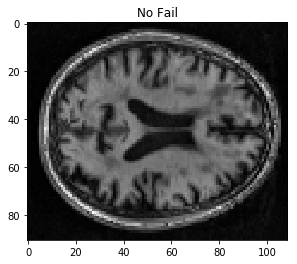

018_S_0425/Month12 Distance from template: 555.728112759 


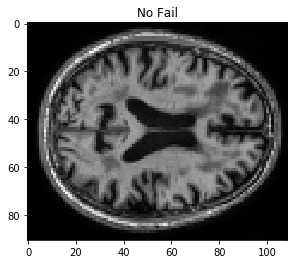

018_S_0425/Month24 Distance from template: 512.590759821 


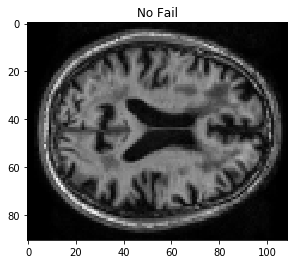

023_S_1046/Baseline Distance from template: 464.505703088 


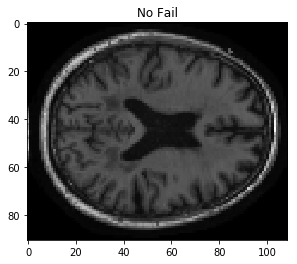

023_S_1046/Month12 Distance from template: 480.355802499 


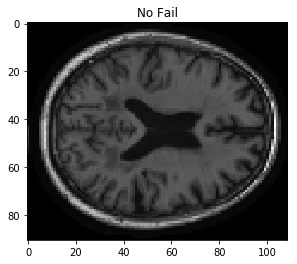

023_S_1046/Month24 Distance from template: 480.591231461 


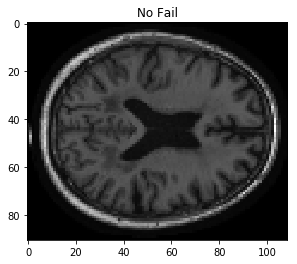

053_S_0507/Baseline Distance from template: 432.835435943 


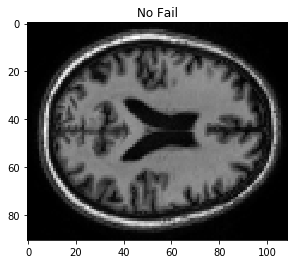

053_S_0507/Month12 Distance from template: 641.061125345 


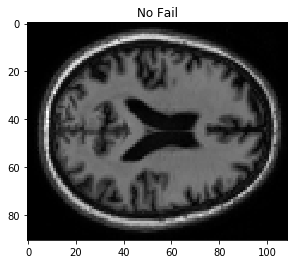

053_S_0507/Month24 Distance from template: 516.894215944 


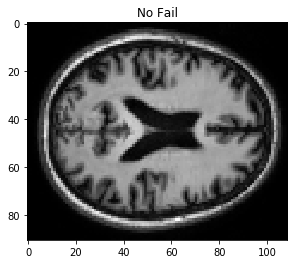

136_S_0196/Baseline Distance from template: 599.467222951 


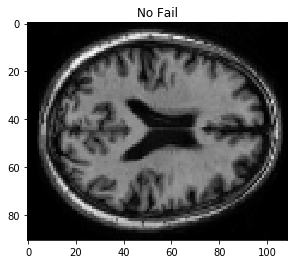

136_S_0196/Month12 Distance from template: 521.309900748 


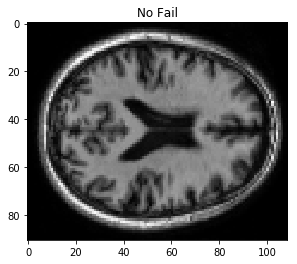

136_S_0196/Month24 Distance from template: 605.855112443 


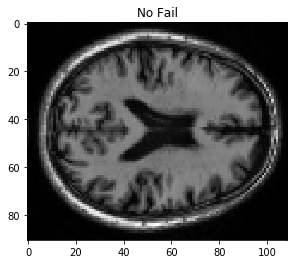

136_S_1227/Baseline Distance from template: 445.719947946 


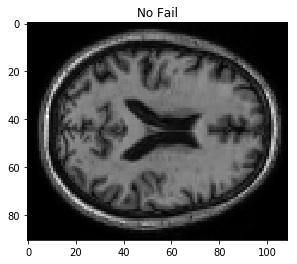

136_S_1227/Month12 Distance from template: 453.353785842 


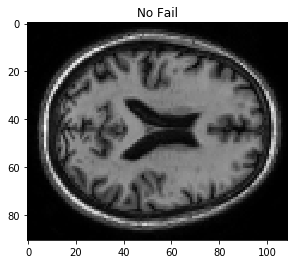

136_S_1227/Month24 Distance from template: 641.10571574 


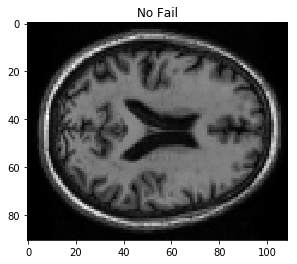

023_S_0031/Baseline Distance from template: 713.403022212 ###


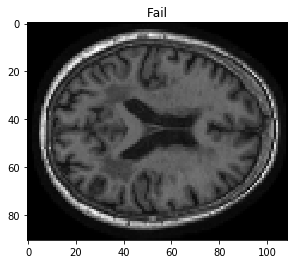

023_S_0031/Month12 Distance from template: 871.319009629 ###


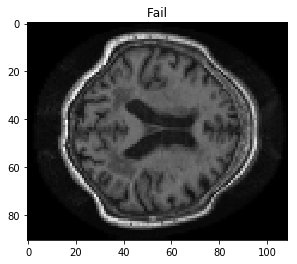

023_S_0031/Month24 Distance from template: 868.060992067 ###


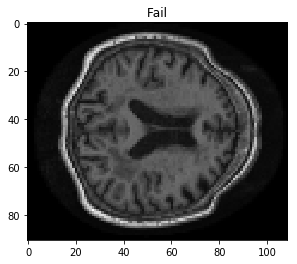

002_S_0729/Baseline Distance from template: 781.733827713 ###


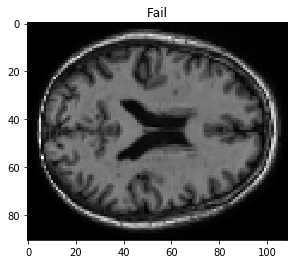

002_S_0729/Month12 Distance from template: 463.499925846 


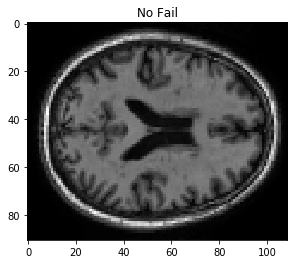

002_S_0729/Month24 Distance from template: 556.480998128 


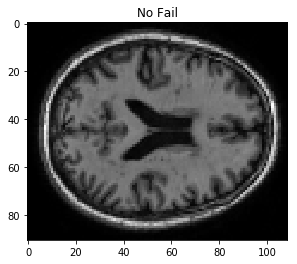

016_S_1326/Baseline Distance from template: 484.85893196 


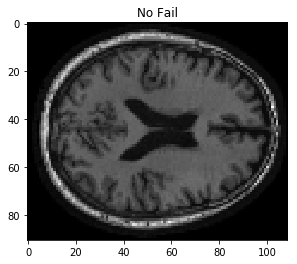

016_S_1326/Month12 Distance from template: 490.819515083 


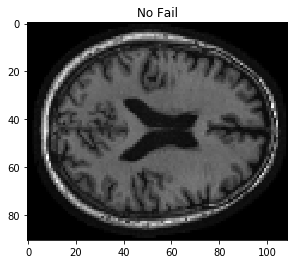

016_S_1326/Month24 Distance from template: 469.045806188 


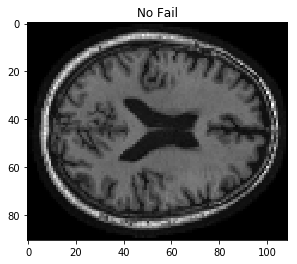

051_S_1123/Baseline Distance from template: 851.888990012 ###


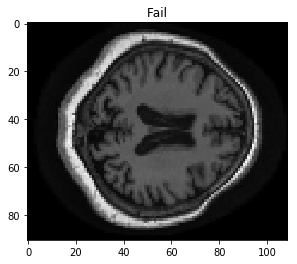

051_S_1123/Month12 Distance from template: 802.808484035 ###


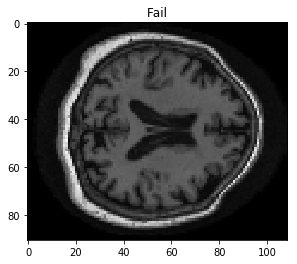

051_S_1123/Month24 Distance from template: 782.480556671 ###


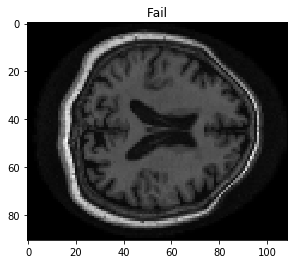

90


In [36]:
# Compute norm for each scan and highlight if above threshold
thresh = 650
fail_count = 0
for idx, sample in enumerate(data[:]):
    # Squash between 0 and 1
    struct_arr = normalize_float(sample, min=0.)
    struct_arr = struct_arr.numpy()

    # Show image slice
    plt.imshow(struct_arr[:,:,45], cmap='gray')
    
    # Compute norm between temp and scan
    norm = np.linalg.norm(struct_arr - avg_scan, ord='fro', axis=(0,1))
    scan_norm = np.sum(norm)
    print(file_names[idx], 'Distance from template:', scan_norm, end=' ')
    
    # Test if norm is larger than threshold
    if(scan_norm > thresh):
        print('###')
        fail_count += 1
        plt.title('Fail')
    else:
        plt.title('No Fail')
        print()
    total_norm += scan_norm
    plt.show()
print("Total failure count", fail_count)